# Polynomial Regression

**Polynomial Regression**은 non-linear data를 linear model로 학습시키는 방법으로, 각 feature에 n-제곱을 취한 값을 새로운 feature로 추가해서 학습을 시키는 방식이다.

예제를 통해 살펴보자. 먼저, quadratic equation($y=ax^2+bx+c$)에 기반한 non-linear data를 생성한다.

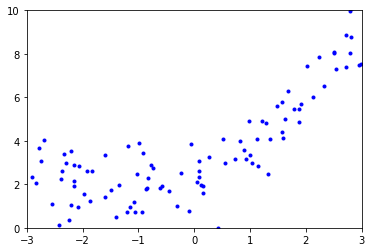

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])
plt.show()

이제 사이킷런의 `PolynomialFeatures` class를 사용해 제곱을 취한 새로운 feature를 추가하자.(2nd-degree polynomial)

In [2]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[1.57528573]
[1.57528573 2.48152514]


위 결과를 통해 `X_poly`가 `X`와 `X`의 제곱 값을 가지는 것을 확인하였다. 이제 `LinearRegression`을 통해 학습시켜보자.

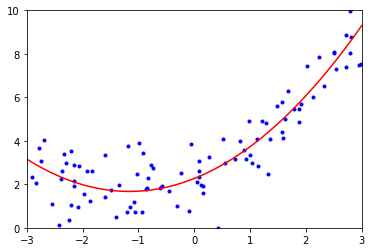

[2.26814426] [[1.02250551 0.43979969]]


In [3]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new = np.expand_dims(np.linspace(-3, 3, 100), 1)
X_new_poly = poly_features.fit_transform(X_new)
y_pred = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_pred, 'r')
plt.axis([-3, 3, 0, 10])
plt.show()

print(lin_reg.intercept_, lin_reg.coef_)

모델이 예측한 식은 $\hat{y} = 0.439x_1^2 + 1.02x_1 + 2.26$이고, 원래 식은 $y = 0.5x_1^2 + 1.0 x_1 + 2.0 + \text{Gaussian noise}$ 였으므로 나쁘지 않은 결과이다.

여러 개의 feature가 있을 때, Polynomial Regression은 feature들간의 관계를 찾을 수 있다.(Linear Regression은 수행하지 못함) 이는 `PolynomialFeature`가 모든 feature의 combination들을 주어진 degree까지 추가하기 때문이다.

예를 들어 feature가 a와 b이고, `PolynomialFeature`에 `degree=3`을 전달하면, $a^2, a^3, b^2, b^3$뿐만 아니라, $ab, a^2b, ab^2$도 추가한다.